# checking for equivalence

## 2 day test run of 201905 


    This test run
        - includes the asselin filter correction and should be run with the smelt_201905_equiv namelist
        - includes code to calculate biological rates.
        - full notes in https://docs.google.com/document/d/1QnDxmC-5pgjy449gdqaR4TF0BKLVlWY_0bIkuMQebEQ/edit
    
1. Objective: We want this run to be the same as the 201905 hindcast, so that we can meaningfully compare them. 

2. Objective: We also want to output remineralization rates. these should be in mmol/s per grid cell
    we can convert to mmol/day and add all the days and get an idea of where sinks and sources are happening in the model. if we do it right. 

    - is this test run the same as the hindcast run?
    
    - what do the prd and remineralization profiles look like?
    
  
    
    
   
    

In [186]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [187]:
import numpy as np
# import xarray as xr
import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
# from scipy.io import loadmat
from cmocean import cm
import pandas as pd
import warnings
import pickle
import arrow
#from cartopy import crs, feature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools
import netCDF4 as nc
import glob

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

### Part 1, Are the two runs the same - do simple plots at 0, 20m, and domain-wide mean depth profiles

In [188]:
hinddir = '/results2/SalishSea/nowcast-green.201905/02jan17/'

hindcarp = 'SalishSea_1d_*_carp_T.nc'
w = glob.glob(hinddir+hindcarp)
hindcarp_nc = nc.Dataset(w[0])

hindgrid = 'SalishSea_1d_*_grid_T.nc'
w = glob.glob(hinddir+hindgrid)
hindgrid_nc = nc.Dataset(w[0])

testdir = '/data/tjarniko/results/FUTURE_runs/01jan17_PROD3/'
testcarp = 'SalishSeaCast_1d_*_carp_T*20170102.nc'
w = glob.glob(testdir+testcarp)
testcarp_nc = nc.Dataset(w[0])

testgrid = 'SalishSeaCast_1d_*_grid_T*20170102.nc'
w = glob.glob(testdir+testgrid)
testgrid_nc = nc.Dataset(w[0])

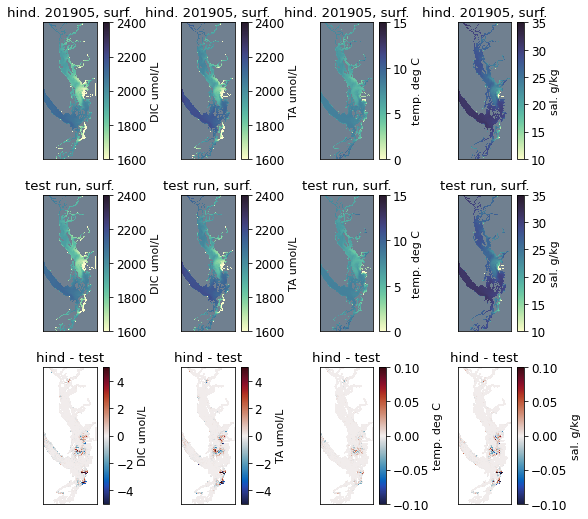

In [189]:
fact = 0.7
fig = plt.figure(figsize=(12*fact,10.5*fact))

to_plot_hind = [hindcarp_nc['dissolved_inorganic_carbon'][0,0,:,:],\
           hindcarp_nc['total_alkalinity'][0,0,:,:],\
           hindgrid_nc['votemper'][0,0,:,:],\
           hindgrid_nc['vosaline'][0,0,:,:]]

to_plot_test = [testcarp_nc['dissolved_inorganic_carbon'][0,0,:,:],\
           testcarp_nc['total_alkalinity'][0,0,:,:],\
           testgrid_nc['votemper'][0,0,:,:],\
           testgrid_nc['vosaline'][0,0,:,:]]

tmin = [1600,1600,0,10]
tmax = [2400,2400,15,35]
clabel = ['DIC umol/L','TA umol/L', 'temp. deg C', 'sal. g/kg']
tit = 'hind. 201905, surf.'

for i in range(1,5):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    
    cmap = cm.deep
    t_plt = to_plot_hind[i-1]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.deep, vmin=tmin[i-1], vmax=tmax[i-1])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-1])
    ax1.set_title(tit)
    
tit = 'test run, surf.'

for i in range(5,9):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    
    cmap = cm.deep
    t_plt = to_plot_test[i-5]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.deep, vmin=tmin[i-5], vmax=tmax[i-5])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-5])
    ax1.set_title(tit)

plt.tight_layout()

## 
tit = 'hind - test'
tmin = [-5,-5,-0.1,-0.1]
tmax = [5,5,0.1,0.1]
for i in range(9,13):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    t_plt = to_plot_hind[i-9] - to_plot_test[i-9]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.balance, vmin=tmin[i-9], vmax=tmax[i-9])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-9])
    ax1.set_title(tit)

plt.tight_layout()

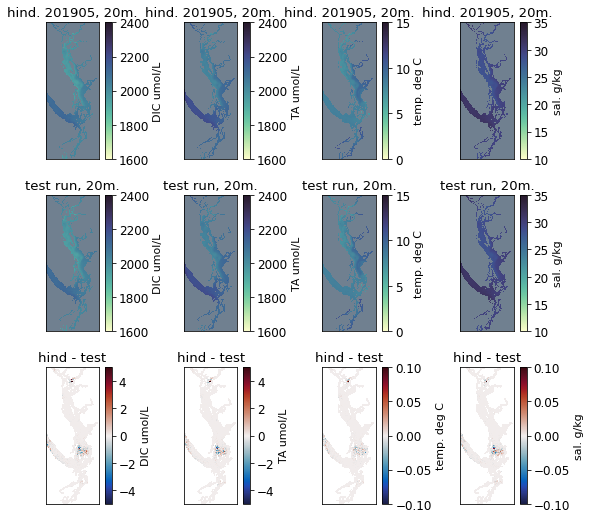

In [190]:
fig = plt.figure(figsize=(12*fact,10.5*fact))

to_plot_hind = [hindcarp_nc['dissolved_inorganic_carbon'][0,20,:,:],\
           hindcarp_nc['total_alkalinity'][0,20,:,:],\
           hindgrid_nc['votemper'][0,20,:,:],\
           hindgrid_nc['vosaline'][0,20,:,:]]

to_plot_test = [testcarp_nc['dissolved_inorganic_carbon'][0,20,:,:],\
           testcarp_nc['total_alkalinity'][0,20,:,:],\
           testgrid_nc['votemper'][0,20,:,:],\
           testgrid_nc['vosaline'][0,20,:,:]]

tmin = [1600,1600,0,10]
tmax = [2400,2400,15,35]
clabel = ['DIC umol/L','TA umol/L', 'temp. deg C', 'sal. g/kg']
tit = 'hind. 201905, 20m.'

for i in range(1,5):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    
    cmap = cm.deep
    t_plt = to_plot_hind[i-1]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.deep, vmin=tmin[i-1], vmax=tmax[i-1])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-1])
    ax1.set_title(tit)
    
tit = 'test run, 20m.'

for i in range(5,9):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    
    cmap = cm.deep
    t_plt = to_plot_test[i-5]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.deep, vmin=tmin[i-5], vmax=tmax[i-5])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-5])
    ax1.set_title(tit)

plt.tight_layout()

## 
tit = 'hind - test'
tmin = [-5,-5,-0.1,-0.1]
tmax = [5,5,0.1,0.1]
for i in range(9,13):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    t_plt = to_plot_hind[i-9] - to_plot_test[i-9]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.balance, vmin=tmin[i-9], vmax=tmax[i-9])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-9])
    ax1.set_title(tit)

plt.tight_layout()

### by-layer sums

In [191]:
to_plot_hind = [hindcarp_nc['dissolved_inorganic_carbon'][0,:,:,:],\
           hindcarp_nc['total_alkalinity'][0,:,:,:],\
           hindgrid_nc['votemper'][0,:,:,:],\
           hindgrid_nc['vosaline'][0,:,:,:]]

to_plot_test = [testcarp_nc['dissolved_inorganic_carbon'][0,:,:,:],\
           testcarp_nc['total_alkalinity'][0,:,:,:],\
           testgrid_nc['votemper'][0,:,:,:],\
           testgrid_nc['vosaline'][0,:,:,:]]


In [192]:
hindcarp_DIC = hindcarp_nc['dissolved_inorganic_carbon'][0,:,:,:]
hindcarp_TA = hindcarp_nc['total_alkalinity'][0,:,:,:]
hindgrid_temp = hindgrid_nc['votemper'][0,:,:,:]
hindgrid_sal = hindgrid_nc['vosaline'][0,:,:,:]

testcarp_DIC = testcarp_nc['dissolved_inorganic_carbon'][0,:,:,:]
testcarp_TA = testcarp_nc['total_alkalinity'][0,:,:,:]
testgrid_temp = testgrid_nc['votemper'][0,:,:,:]
testgrid_sal = testgrid_nc['vosaline'][0,:,:,:]

hindcarp_DIC[hindcarp_DIC == 0 ] = np.nan
hindcarp_TA[hindcarp_TA == 0 ] = np.nan
hindgrid_temp[hindgrid_temp == 0 ] = np.nan
hindgrid_sal[hindgrid_sal == 0 ] = np.nan

testcarp_DIC[testcarp_DIC == 0 ] = np.nan
testcarp_TA[testcarp_TA == 0 ] = np.nan
testgrid_temp[testgrid_temp == 0 ] = np.nan
testgrid_sal[testgrid_sal == 0 ] = np.nan

In [193]:
hindcarp_DIC_p = np.nanmean(np.nanmean(hindcarp_DIC, axis = 2),axis =1)
hindcarp_TA_p = np.nanmean(np.nanmean(hindcarp_TA, axis = 2),axis =1)
hindgrid_temp_p = np.nanmean(np.nanmean(hindgrid_temp, axis = 2),axis =1)
hindgrid_sal_p = np.nanmean(np.nanmean(hindgrid_sal, axis = 2),axis =1)

testcarp_DIC_p = np.nanmean(np.nanmean(testcarp_DIC, axis = 2),axis =1)
testcarp_TA_p = np.nanmean(np.nanmean(testcarp_TA, axis = 2),axis =1)
testgrid_temp_p = np.nanmean(np.nanmean(testgrid_temp, axis = 2),axis =1)
testgrid_sal_p = np.nanmean(np.nanmean(testgrid_sal, axis = 2),axis =1)

In [194]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

Text(0.5, 0.98, 'domain-wide means of 1-day avg at 02jan17, Red: hindcast, black: testrun \n (yaxis units (m) , x-axis as expected)')

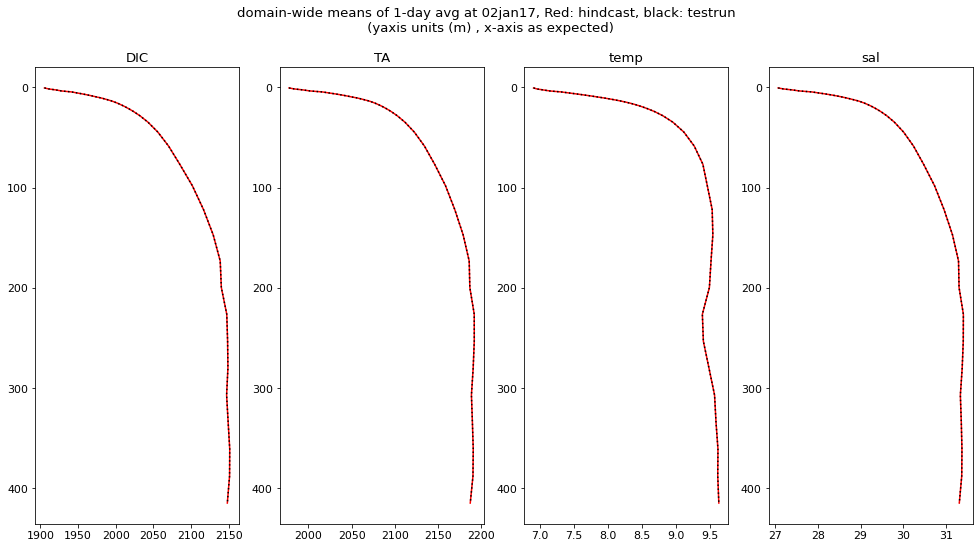

In [195]:
## plotting
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
td = (w['gdept_1d'][0,:])
fact = 0.6

fig, axs = plt.subplots(1,4, figsize=(28*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(hindcarp_DIC_p,td, color = 'r',linestyle = '-')
axs[0].plot(testcarp_DIC_p,td, color = 'k',linestyle = ':')
axs[0].invert_yaxis(); axs[0].set_title('DIC')

axs[1].plot(hindcarp_TA_p,td, color = 'r',linestyle = '-')
axs[1].plot(testcarp_TA_p,td, color = 'k',linestyle = ':')
axs[1].invert_yaxis(); axs[1].set_title('TA')

axs[2].plot(hindgrid_temp_p,td, color = 'r',linestyle = '-')
axs[2].plot(testgrid_temp_p,td, color = 'k',linestyle = ':')
axs[2].invert_yaxis(); axs[2].set_title('temp')

axs[3].plot(hindgrid_sal_p,td, color = 'r',linestyle = '-')
axs[3].plot(testgrid_sal_p,td, color = 'k',linestyle = ':')
axs[3].invert_yaxis(); axs[3].set_title('sal')

plt.suptitle('domain-wide means of 1-day avg at 02jan17, Red: hindcast, black: testrun \n (yaxis units (m) , x-axis as expected)')

Text(0.5, 0.98, '% difference in mean quantity between hind and test, \n (yaxis units (m) , x-axis % of quantity (ie ((hind-test)/hind) * 100)')

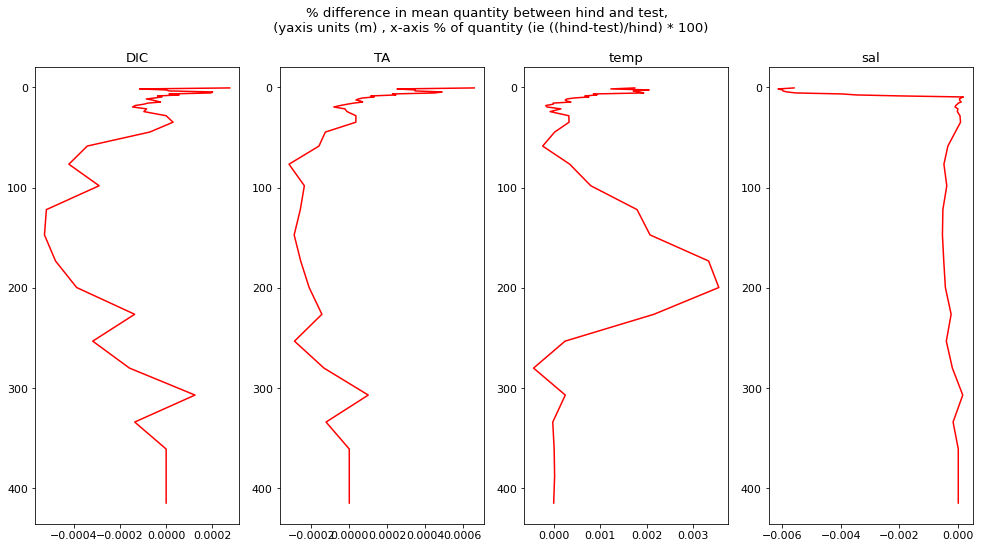

In [196]:
## plotting
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
td = (w['gdept_1d'][0,:])
fact = 0.6

fig, axs = plt.subplots(1,4, figsize=(28*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(((hindcarp_DIC_p-testcarp_DIC_p)/hindcarp_DIC_p)*100 ,td, color = 'r',linestyle = '-')
axs[0].invert_yaxis(); axs[0].set_title('DIC')

axs[1].plot(((hindcarp_TA_p-testcarp_TA_p)/hindcarp_TA_p)*100 ,td, color = 'r',linestyle = '-')
axs[1].invert_yaxis(); axs[1].set_title('TA')

axs[2].plot(((hindgrid_temp_p-testgrid_temp_p)/hindgrid_temp_p)*100 ,td, color = 'r',linestyle = '-')
#axs[2].plot(testgrid_temp_p,td, color = 'k',linestyle = ':')
axs[2].invert_yaxis(); axs[2].set_title('temp')

axs[3].plot(((hindgrid_sal_p-testgrid_sal_p)/hindgrid_sal_p)*100 ,td, color = 'r',linestyle = '-')

axs[3].invert_yaxis(); axs[3].set_title('sal')

plt.suptitle('% difference in mean quantity between hind and test, \n (yaxis units (m) , x-axis % of quantity (ie ((hind-test)/hind) * 100)')

## do this for the whole available timeseries (first 2 segment, day 0-60)


In [197]:
# ## extract data

# start ='2017-01-01'
# end ='2017-03-01'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)

# BUDGET_DIC = np.zeros([dayslen,40,898,398])
# BUDGET_CO2 = np.zeros([dayslen,898,398])

# BUDGET_NIT = np.zeros([dayslen,40,898,398])
# BUDGET_DIAT = np.zeros([dayslen,40,898,398])

# BUDGET_TEMP = np.zeros([dayslen,40,898,398])
# BUDGET_SAL = np.zeros([dayslen,40,898,398])


# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     #if i%10 == 0:
#     print(ymd)
    
#     findfil_carp = f'/data/tjarniko/results/FUTURE_runs/BUDGET/*/SalishSeaCast_1d_*carp*{ymd}.nc'
#     foundfil_carp = glob.glob(findfil_carp)
#     fcarp = nc.Dataset(foundfil_carp[0])
    
#     BUDGET_DIC[i,:,:,:] = fcarp['dissolved_inorganic_carbon'][0,:,:,:]
#     BUDGET_CO2[i,:,:] = fcarp['co2_flux_mmol_m2_s'][0,:,:]
    
#     findfil_ptrc = f'/data/tjarniko/results/FUTURE_runs/BUDGET/*/SalishSeaCast_1d_*ptrc*{ymd}.nc'
#     foundfil_ptrc = glob.glob(findfil_ptrc)
#     fptrc = nc.Dataset(foundfil_ptrc[0])
    
#     BUDGET_NIT[i,:,:,:] = fptrc['nitrate'][0,:,:,:]
#     BUDGET_DIAT[i,:,:,:] = fptrc['diatoms'][0,:,:,:]
    
#     findfil_grid_T = f'/data/tjarniko/results/FUTURE_runs/BUDGET/*/SalishSeaCast_1d_*grid_T*{ymd}.nc'
#     foundfil_grid_T = glob.glob(findfil_grid_T)
#     fgrid_T = nc.Dataset(foundfil_grid_T[0])
    
#     BUDGET_TEMP[i,:,:,:] = fgrid_T['votemper'][0,:,:,:]
#     BUDGET_SAL[i,:,:,:] = fgrid_T['vosaline'][0,:,:,:]
    
# # pickle.dump(BUDGET_TEMP, open("./pkls/BUDGET_TEMP.pkl", 'wb'))
# # pickle.dump(BUDGET_SAL, open("./pkls/BUDGET_SAL.pkl", 'wb'))
# # pickle.dump(BUDGET_DIAT, open("./pkls/BUDGET_DIAT.pkl", 'wb'))
# # pickle.dump(BUDGET_NIT, open("./pkls/BUDGET_NIT.pkl", 'wb'))
# # pickle.dump(BUDGET_DIC, open("./pkls/BUDGET_DIC.pkl", 'wb'))
# # pickle.dump(BUDGET_CO2, open("./pkls/BUDGET_CO2.pkl", 'wb'))


In [198]:
# ## extract data

# HIND_DIC = np.zeros([dayslen,40,898,398])
# #HIND_CO2 = np.zeros([dayslen,898,398])

# HIND_NIT = np.zeros([dayslen,40,898,398])
# HIND_DIAT = np.zeros([dayslen,40,898,398])

# HIND_TEMP = np.zeros([dayslen,40,898,398])
# HIND_SAL = np.zeros([dayslen,40,898,398])


# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     #if i%10 == 0:
#     print(ymd)
    
#     findfil_carp = f'/results2/SalishSea/nowcast-green.201905/*/SalishSea_1d_{ymd}*carp*.nc'
#     foundfil_carp = glob.glob(findfil_carp)
#     fcarp = nc.Dataset(foundfil_carp[0])
    
#     HIND_DIC[i,:,:,:] = fcarp['dissolved_inorganic_carbon'][0,:,:,:]
#     #HIND_CO2[i,:,:] = fcarp['co2_flux_mmol_m2_s'][0,:,:]
    
#     findfil_ptrc = f'/results2/SalishSea/nowcast-green.201905/*/SalishSea_1d_{ymd}*ptrc*.nc'
#     foundfil_ptrc = glob.glob(findfil_ptrc)
#     fptrc = nc.Dataset(foundfil_ptrc[0])
    
#     HIND_NIT[i,:,:,:] = fptrc['nitrate'][0,:,:,:]
#     HIND_DIAT[i,:,:,:] = fptrc['diatoms'][0,:,:,:]
    
#     findfil_grid_T = f'/results2/SalishSea/nowcast-green.201905/*/SalishSea_1d_{ymd}*grid_T*.nc'
#     foundfil_grid_T = glob.glob(findfil_grid_T)
#     fgrid_T = nc.Dataset(foundfil_grid_T[0])
    
#     HIND_TEMP[i,:,:,:] = fgrid_T['votemper'][0,:,:,:]
#     HIND_SAL[i,:,:,:] = fgrid_T['vosaline'][0,:,:,:]
    
# # pickle.dump(HIND_TEMP, open("./pkls/HIND_TEMP.pkl", 'wb'))
# # pickle.dump(HIND_SAL, open("./pkls/HIND_SAL.pkl", 'wb'))
# # pickle.dump(HIND_DIAT, open("./pkls/HIND_DIAT.pkl", 'wb'))
# # pickle.dump(HIND_NIT, open("./pkls/HIND_NIT.pkl", 'wb'))
# # pickle.dump(HIND_DIC, open("./pkls/HIND_DIC.pkl", 'wb'))
# # pickle.dump(HIND_CO2, open("./pkls/HIND_CO2.pkl", 'wb'))


In [199]:
# # BUDGET_TEMP = pickle.load(open('./pkls/BUDGET_TEMP.pkl', 'rb'))
# # BUDGET_SAL = pickle.load(open('./pkls/BUDGET_SAL.pkl', 'rb'))
# # BUDGET_DIC = pickle.load(open('./pkls/BUDGET_DIC.pkl', 'rb'))
# # BUDGET_NIT = pickle.load(open('./pkls/BUDGET_NIT.pkl', 'rb'))
# # BUDGET_DIAT = pickle.load(open('./pkls/BUDGET_DIAT.pkl', 'rb'))
# # BUDGET_CO2 = pickle.load(open('./pkls/BUDGET_CO2.pkl', 'rb'))

# w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# tmask = (w['tmask'])

# tmask_broad = np.zeros_like(BUDGET_DIAT)

# for i in range(0,dayslen):
#     tmask_broad[i,:,:] = tmask[0,:,:]

# BUDGET_TEMP[tmask_broad == 0 ] = np.nan
# BUDGET_SAL[tmask_broad == 0 ] = np.nan
# BUDGET_DIC[tmask_broad == 0 ] = np.nan
# BUDGET_NIT[tmask_broad == 0 ] = np.nan
# BUDGET_DIAT[tmask_broad == 0 ] = np.nan
# #BUDGET_CO2[BUDGET_CO2 == 0 ] = np.nan

# BUDGET_TEMP_p = np.nanmean(np.nanmean(BUDGET_TEMP, axis = 2),axis =2)
# BUDGET_SAL_p = np.nanmean(np.nanmean(BUDGET_SAL, axis = 2),axis =2)
# BUDGET_DIC_p = np.nanmean(np.nanmean(BUDGET_DIC, axis = 2),axis =2)
# BUDGET_NIT_p = np.nanmean(np.nanmean(BUDGET_NIT, axis = 2),axis =2)
# BUDGET_DIAT_p = np.nanmean(np.nanmean(BUDGET_DIAT, axis = 2),axis =2)
# #BUDGET_CO2_p = np.nanmean(np.nanmean(BUDGET_CO2, axis = 2),axis =2)

# pickle.dump(BUDGET_TEMP_p, open("./pkls/BUDGET_TEMP_p.pkl", 'wb'))
# pickle.dump(BUDGET_SAL_p, open("./pkls/BUDGET_SAL_p.pkl", 'wb'))
# pickle.dump(BUDGET_DIAT_p, open("./pkls/BUDGET_DIAT_p.pkl", 'wb'))
# pickle.dump(BUDGET_NIT_p, open("./pkls/BUDGET_NIT_p.pkl", 'wb'))
# pickle.dump(BUDGET_DIC_p, open("./pkls/BUDGET_DIC_p.pkl", 'wb'))
# #pickle.dump(BUDGET_CO2_p, open("./pkls/BUDGET_CO2_p.pkl", 'wb'))


In [200]:
# # HIND_TEMP = pickle.load(open('./pkls/HIND_TEMP.pkl', 'rb'))
# # HIND_SAL = pickle.load(open('./pkls/HIND_SAL.pkl', 'rb'))
# # HIND_DIC = pickle.load(open('./pkls/HIND_DIC.pkl', 'rb'))
# # HIND_NIT = pickle.load(open('./pkls/HIND_NIT.pkl', 'rb'))
# # HIND_DIAT = pickle.load(open('./pkls/HIND_DIAT.pkl', 'rb'))
# # HIND_CO2 = pickle.load(open('./pkls/HIND_CO2.pkl', 'rb'))

# w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# tmask = (w['tmask'])

# tmask_broad = np.zeros_like(HIND_DIAT)

# for i in range(0,dayslen):
#     tmask_broad[i,:,:] = tmask[0,:,:]

# HIND_TEMP[tmask_broad == 0 ] = np.nan
# HIND_SAL[tmask_broad == 0 ] = np.nan
# HIND_DIC[tmask_broad == 0 ] = np.nan
# HIND_NIT[tmask_broad == 0 ] = np.nan
# HIND_DIAT[tmask_broad == 0 ] = np.nan
# #HIND_CO2[HIND_CO2 == 0 ] = np.nan

# HIND_TEMP_p = np.nanmean(np.nanmean(HIND_TEMP, axis = 2),axis =2)
# HIND_SAL_p = np.nanmean(np.nanmean(HIND_SAL, axis = 2),axis =2)
# HIND_DIC_p = np.nanmean(np.nanmean(HIND_DIC, axis = 2),axis =2)
# HIND_NIT_p = np.nanmean(np.nanmean(HIND_NIT, axis = 2),axis =2)
# HIND_DIAT_p = np.nanmean(np.nanmean(HIND_DIAT, axis = 2),axis =2)
# #HIND_CO2_p = np.nanmean(np.nanmean(HIND_CO2, axis = 2),axis =2)

# pickle.dump(HIND_TEMP_p, open("./pkls/HIND_TEMP_p.pkl", 'wb'))
# pickle.dump(HIND_SAL_p, open("./pkls/HIND_SAL_p.pkl", 'wb'))
# pickle.dump(HIND_DIAT_p, open("./pkls/HIND_DIAT_p.pkl", 'wb'))
# pickle.dump(HIND_NIT_p, open("./pkls/HIND_NIT_p.pkl", 'wb'))
# pickle.dump(HIND_DIC_p, open("./pkls/HIND_DIC_p.pkl", 'wb'))
# #pickle.dump(HIND_CO2_p, open("./pkls/HIND_CO2_p.pkl", 'wb'))


In [201]:
HIND_TEMP_p =  pickle.load(open('./pkls/HIND_TEMP_p.pkl', 'rb'))
HIND_SAL_p =  pickle.load(open('./pkls/HIND_SAL_p.pkl', 'rb'))
HIND_DIC_p =  pickle.load(open('./pkls/HIND_DIC_p.pkl', 'rb'))
HIND_NIT_p =  pickle.load(open('./pkls/HIND_NIT_p.pkl', 'rb'))
HIND_DIAT_p =  pickle.load(open('./pkls/HIND_DIAT_p.pkl', 'rb'))

BUDGET_TEMP_p =  pickle.load(open('./pkls/BUDGET_TEMP_p.pkl', 'rb'))
BUDGET_SAL_p =  pickle.load(open('./pkls/BUDGET_SAL_p.pkl', 'rb'))
BUDGET_DIC_p =  pickle.load(open('./pkls/BUDGET_DIC_p.pkl', 'rb'))
BUDGET_NIT_p =  pickle.load(open('./pkls/BUDGET_NIT_p.pkl', 'rb'))
BUDGET_DIAT_p =  pickle.load(open('./pkls/BUDGET_DIAT_p.pkl', 'rb'))

## what sort of differences in by-layer quantities do we see between the two runs?

## and do they change with time?

In [202]:
def plot_quant(quantity_p,no,quantname):
    for i in range(0,dayslen):
            axs[no].plot(quantity_p[i,:],td,color = tcm(1.*(i+shift)/seg), linewidth = 1)
    for i in range(0,dayslen):
        if i%intvl == 0:
            axs[no].plot(quantity_p[i,:],td,\
                        color = tcm(1.*(i+shift)/seg), linewidth = 2.2, label = f'day {i}')
    axs[no].invert_yaxis(); axs[no].set_title(quantname)
    axs[no].legend()
    
def plot_quant_diff(quantity_p,quantity2_p,no,quantname):
    for i in range(0,dayslen):
            axs[no].plot(quantity_p[i,:]-quantity2_p[i,:],td,color = tcm(1.*(i+shift)/seg), linewidth = 1)
    for i in range(0,dayslen):
        if i%intvl == 0:
            axs[no].plot(quantity_p[i,:]-quantity2_p[i,:],td,\
                        color = tcm(1.*(i+shift)/seg), linewidth = 2.2, label = f'day {i}')
    axs[no].invert_yaxis(); axs[no].set_title(quantname)
    axs[no].legend()

Text(0.5, 0.98, 'domain average quantities and % difference in mean quantity between hind and test, \n (yaxis units (m) , x-axis % of quantity (ie ((hind-test)/hind) * 100)')

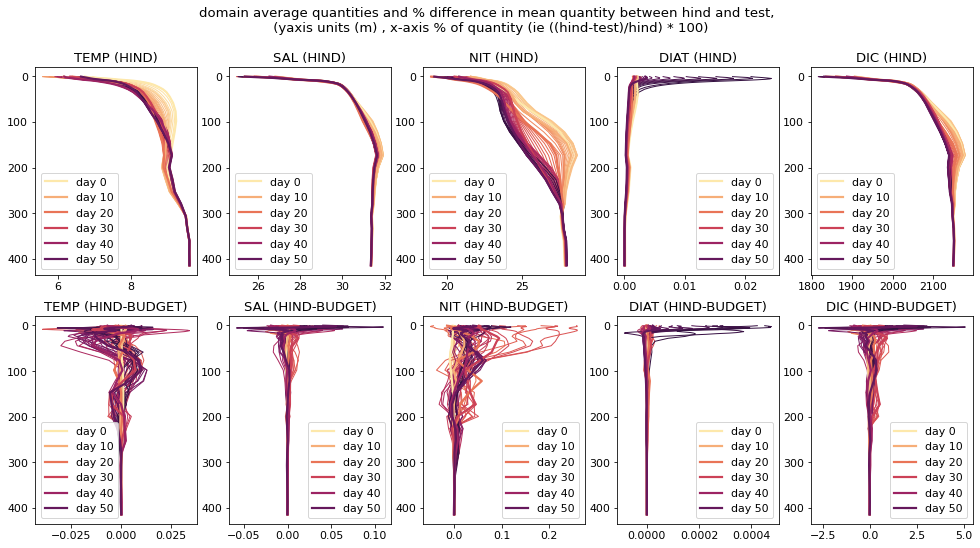

In [203]:
## plotting
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
td = (w['gdept_1d'][0,:])
fact = 0.6

tcm = cm.matter
shift = 1
seg = 61
intvl = 10
dayslen = 60

fig, axs = plt.subplots(2,5, figsize=(28*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plot_quant(HIND_TEMP_p,0,'TEMP (HIND)')
plot_quant(HIND_SAL_p,1,'SAL (HIND)')
plot_quant(HIND_NIT_p,2,'NIT (HIND)')
plot_quant(HIND_DIAT_p,3,'DIAT (HIND)')
plot_quant(HIND_DIC_p,4,'DIC (HIND)')

plot_quant_diff(HIND_TEMP_p,BUDGET_TEMP_p,5,'TEMP (HIND-BUDGET)')
plot_quant_diff(HIND_SAL_p,BUDGET_SAL_p,6,'SAL (HIND-BUDGET)')
plot_quant_diff(HIND_NIT_p,BUDGET_NIT_p,7,'NIT (HIND-BUDGET)')
plot_quant_diff(HIND_DIAT_p,BUDGET_DIAT_p,8,'DIAT (HIND-BUDGET)')
plot_quant_diff(HIND_DIC_p,BUDGET_DIC_p,9,'DIC (HIND-BUDGET)')



plt.suptitle('domain average quantities and % difference in mean quantity between hind and test, \n (yaxis units (m) , x-axis % of quantity (ie ((hind-test)/hind) * 100)')

# Notes: 

- obvious but: set output to nan where landmask, not where == 0. 
- no blowups, but a small drift in the nitrate, diatoms, dic - why? (seems less notable after 60 days)